# Decision Trees

#### Instructions:
- Write modular code with relevant docstrings and comments for you to be able to use
functions you have implemented in future assignments.
- All theory questions and observations must be written in a markdown cell of your jupyter notebook.You can alsoadd necessary images in `imgs/` and then include it in markdown. Any other submission method for theoretical question won't be entertained.
- Start the assignment early, push your code regularly and enjoy learning!

### Question 1 Optimal DT from table
**[20 points]**\
We will use the dataset below to learn a decision tree which predicts if people pass machine
learning (Yes or No), based on their previous GPA (High, Medium, or Low) and whether or
not they studied. 

| GPA | Studied | Passed |
|:---:|:-------:|:------:|
|  L  |    F    |    F   |
|  L  |    T    |    T   |
|  M  |    F    |    F   |
|  M  |    T    |    T   |
|  H  |    F    |    T   |
|  H  |    T    |    T   |
    
 For this problem, you can write your answers using $log_2$
, but it may be helpful to note
that $log_2 3 ≈ 1.6$.

---
1. What is the entropy H(Passed)?
2. What is the entropy H(Passed | GPA)?
3. What is the entropy H(Passed | Studied)?
4. Draw the full decision tree that would be learned for this dataset. You do
not need to show any calculations.
---


### Ans 1.
H(Passed) = -(4/6)log2(4/6) - (2/6)log2(2/6) = 0.92

### Ans 2.
H(passed|GPA) = (1/3)(-(1/2)log2(1/2) - (1/2)log2(1/2)) + (1/3)(-(1/2)log2(1/2) - (1/2)log2(1/2)) + (1/3)(-1log2(1)) = 0.67

### Ans 3.
H(passed|Studied) = 1/2(-(3/3)log2(3/3) - (0/3)log2(0/3)) + 1/2(-(1/3)log2(1/3) - (2/3)log2(2/3)) = 0.46

### Ans 4.
<img src="imgs/ans4.jpeg" >

### Question 2 DT loss functions
**[10 points]**
1. Explain Gini impurity and Entropy. 
2. What are the min and max values for both Gini impurity and Entropy
3. Plot the Gini impurity and Entropy for $p\in[0,1]$.
4. Multiply Gini impurity by a factor of 2 and overlay it over entropy.

#### Ans 1
Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. It means an attribute with lower Gini impurity should be preferred.
Entropy is a measure of the uncertainty of a random variable. It is the average level of information contained in the variable. It means an attribute with lower entropy should be preferred.
#### Ans 2
Gini impurity: min = 0, max = 0.5

Entropy: min = 0, max = 1
#### Ans 3
<img src="imgs/q2(3).png" >

where the orange curve represents gini impurity and the green curve represents entropy.

#### Ans 4
<img src="imgs/q2(4).png" >

where the orange curve represents gini impurity multiplied by a factor of 2 and the green curve represents entropy.

### Question 3 Training a Decision Tree  
**[40 points]**

You can download the spam dataset from the link given below. This dataset contains feature vectors and the lables of Spam/Non-Spam mails. 
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

**NOTE: The last column in each row represents whether the mail is spam or non spam**\
Although not needed, incase you want to know what the individual columns in the feature vector means, you can read it in the documentation given below.
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION

**Download the data and load it from the code given below**

In [121]:

#######################
import pandas as pd
spam = pd.read_csv('./spambase.data', sep=',', header=None)
#######################


You can try to normalize each column (feature) separately with wither one of the following ideas. **Do not normalize labels**.
- Shift-and-scale normalization: substract the minimum, then divide by new maximum. Now all values are between 0-1
- Zero mean, unit variance : substract the mean, divide by the appropriate value to get variance=1.

In [122]:

#######################
# Your code goes here #
import numpy as np
num_cols = spam.shape[1]
for i in range(num_cols):
    if i != num_cols-1:
        spam.iloc[:,i] = spam.iloc[:,i] - np.min(spam.iloc[:,i])
        spam.iloc[:,i] = spam.iloc[:,i] / np.max(spam.iloc[:,i])
spam = spam.to_numpy()
# get the last column of spam
spam_labels = spam[:,-1]
#######################


1. Split your data into train 80% and test dataset 20% 
2. **[BONUS]** Visualize the data using PCA . You can reduce the dimension of the data if you want. Bonus marks if this increases your accuracy.

*NOTE: If you are applying PCA or any other type of dimensionality reduction, do it before splitting the dataset*

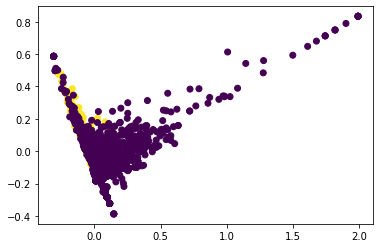

In [123]:

#######################
# Your code goes here #
from sklearn.model_selection import train_test_split
# apply pca to the data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
# do pca except on last column
spam_pca = pca.fit_transform(spam[:,:-1])
# plot the data
plt.scatter(spam_pca[:,0], spam_pca[:,1], c=spam_labels)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(spam[:,:-1], spam_labels, test_size=0.2, random_state=42)

#######################


You need to perform a K fold validation on this and report the average training error over all the k validations. 
- For this , you need to split the training data into k splits.
- For each split, train a decision tree model and report the training , validation and test scores.
- Report the scores in a tabular form for each validation

In [124]:
# Initialize K and split the data
#Run the K fold Validation and report the scores

#######################
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

kf = KFold(n_splits=10, shuffle=True, random_state=42)

clf = DecisionTreeClassifier(random_state=0)
training_scores = []
validation_scores = []
testing_scores = []

for train_index, test_index in kf.split(X_train,y_train):
    # split the data into training and validation
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    
    # train the model
    clf.fit(X_train_fold, y_train_fold)
    # get the training score
    training_scores.append(clf.score(X_train_fold, y_train_fold))
    # get the validation score
    validation_scores.append(clf.score(X_val_fold, y_val_fold))
    # get the testing score
    testing_scores.append(clf.score(X_test, y_test))

print(pd.DataFrame({'Training Scores': training_scores, 'Validation Scores': validation_scores, 'Testing Scores': testing_scores}))
print("Mean training score: ", np.mean(training_scores))
print("Mean validation score: ", np.mean(validation_scores))
print("Mean testing score: ", np.mean(testing_scores))


#######################


   Training Scores  Validation Scores  Testing Scores
0         0.999396           0.899457        0.907709
1         0.999698           0.904891        0.901194
2         0.999396           0.883152        0.893594
3         0.999396           0.934783        0.912052
4         0.999698           0.918478        0.915309
5         0.999698           0.926630        0.912052
6         0.999698           0.929348        0.900109
7         0.999396           0.899457        0.899023
8         0.999396           0.915761        0.894680
9         0.999396           0.918478        0.913138
Mean training score:  0.9995169082125603
Mean validation score:  0.9130434782608695
Mean testing score:  0.9048859934853419


### Question 4 Random Forest Algorithm
**[30 points]**

1. What is boosting, bagging and  stacking?
Which class does random forests belong to and why? **[5 points]**

**Bagging**-  Bagging or Bootstrap Aggregation is an ensemble method in which we randomly draw datasets with replacement from training data such that each dataset is of the same size as the training data. On every dataset we train a weak classifier, and for prediction we take the most frequent class predicted by all the classifiers. It is a technique to reduce variance in the model.

**Boosting**- Boosting is an ensemble method in which we train the weak classifiers sequentially unlike bagging where the classifiers are trained parallely. In each iteration, we train a classifier on the training data and then update the weights of the training data based on the performance of the classifier. In the next iteration, we train another classifier on the updated weights of the training data. This process is repeated until the number of iterations is reached. It is a technique to reduce bias in the model.

**Stacking**- Stacking is another ensemble method similar to bagging and boosting. Here, however,we take heterogeneous weak classifiers i.e. classifiers are built using different learning algorithms. Every classifer is trained using the entire dataset instead of drawing samples with replacement. The predictions made by these base models are used to train a meta model which is used for prediction. 

**Random forests** belong to the bagging category because in random forest we train multiple weak decision trees on datasets produced from the training data with replacement and take the most frequent class predicted by all the trees.

2. Implement random forest algorithm using different decision trees. **[25 points]** 

In [125]:
from collections import Counter
from math import sqrt

def random_forest_algorithm(): # Pass necessary params as per requirements
    #######################
    
    dts=[]
    dt_features = []

    num_trees = 71
    for i in range(num_trees):
        clf=DecisionTreeClassifier(random_state=0,max_depth=5, max_features=int(sqrt(57)))
        # select all samples randomly with replacement
        samples = np.random.choice(3680, 3680, replace=True)
        clf.fit(X_train[samples], y_train[samples])
        # append the decision tree to the list of decision trees
        dts.append(clf)
    
    predictions = []
    votes = []
    # iterate over testing samples
    for i in range(X_test.shape[0]): 
        # iterate over the 100 decision trees
        for j in range(num_trees):
            # get the prediction of the jth decision tree
            pred = dts[j].predict(X_test[i].reshape(1,-1))[0]
            votes.append(pred)
        majority_vote = Counter(votes).most_common(1)[0][0]
        predictions.append(majority_vote)
        votes = []
    print("Accuracy: ", np.mean(predictions == y_test))
    #######################

random_forest_algorithm()



Accuracy:  0.8903365906623235
